## pip

In [2]:
%%bash
python -m pip install --upgrade pip
pip install git+https://github.com/ProfessorGuineapig/climate-learn.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ProfessorGuineapig/climate-learn.git to /tmp/pip-req-build-nsl98ft1
  Resolved https://github.com/ProfessorGuineapig/climate-learn.git to commit 0a992040e49e7e895ef7ece29f7caade8d87841c
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): star

  Running command git clone --filter=blob:none --quiet https://github.com/ProfessorGuineapig/climate-learn.git /tmp/pip-req-build-nsl98ft1


In [3]:
pip install climetlab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.7/160.7 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 50.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 62.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 65.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.t

In [4]:
pip install -U rich

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.7/238.7 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.7 MB/s eta 0:00:00
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.6.1
    Uninstalling Pygments-2.6.1:
      Successfully uninstalled Pygments-2.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.


In [5]:
pip install cdsapi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Climetlab is a useful tool for visualizing geographical data. It allows users to easily analyze data from a variety of sources. With Climetlab, users can quickly and efficiently create visualizations of the downloaded data. For more detailed instructions on how to use Climetlab, please check out the [Docs](https://climetlab.readthedocs.io/en/latest/overview.html) page.**

In [6]:
# Download data from copernicus (~15-20 mins)
# Generate API KEY: https://cds.climate.copernicus.eu/api-how-to
# api_key = "154140:40d3d2e0-ed2c-4f60-8bc8-d15789841be0" # Change to your_api_key
# download(source = "copernicus", variable = "2m_temperature", dataset = "era5", year = 1979, api_key = api_key)

**To download copernicus data, I rewrite some relevant parts of the source codes, the block code below should be run each time.**

## get data

In [1]:
from google.colab import drive
drive.mount('/content/drive')
from climate_learn.data import download
from mmap import ACCESS_READ
#@title def download_copernicus
# Standard library
import argparse
import os
import subprocess

# Local application
#from .constants import NAME_TO_CMIP

# Third party
import cdsapi


months = [str(i).rjust(2, "0") for i in range(1, 13)]
days = [str(i).rjust(2, "0") for i in range(1, 32)]
times = [str(i).rjust(2, "0") + ":00" for i in range(0, 24)]

# TODO: write exceptions in the docstrings
# TODO: figure out how to better specify legal args for dataset, variable,
#   and resolution
# TODO: for download ESGF, do we have to download all the years?
# TODO: can main even be run without runtime warning? maybe we should get rid of it


def download_copernicus(root, dataset, variable, year, resolution, area, pressure=False, api_key=None):
    """Downloads data from the Copernicus Climate Data Store (CDS).
        Data is stored at `root/dataset/variable/` as NetCDF4 (`.nc`) files.
        Skips the download if a file of the expected naming convention already
        exists at the download destination. More info:
        https://cds.climate.copernicus.eu/cdsapp#!/home

    :param root: The root data directory.
    :type root: str
    :param dataset: The dataset to download. Currently, only "era5" is
        supported.
    :type dataset: str
    :param variable: The variable to download from the specified dataset.
    :type variable: str
    :param pressure: Whether to download data from different pressure levels
        instead of single-level. Defaults to `False`.
    :type pressure: bool, optional
    :param api_key: An API key for accessing CDS. Defaults to `None`. See here
        for more info: https://cds.climate.copernicus.eu/api-how-to.
    :type api_key: str, optional
    """
    if dataset not in ["era5"]:
        raise Exception("Dataset not supported")

    if api_key is not None:
        content = f"url: https://cds.climate.copernicus.eu/api/v2\nkey: {api_key}"
        open(f"{os.environ['HOME']}/.cdsapirc", "w").write(content)

    path = os.path.join(root, dataset, resolution, variable, f"{variable}_{year}_{resolution}deg.nc")
    print(
        f"Downloading {dataset} {variable} data for year {year} from copernicus to {path}"
    )

    if os.path.exists(path):
        return

    os.makedirs(os.path.dirname(path), exist_ok=True)

    download_args = {
        "product_type": "reanalysis",
        "format": "netcdf",
        "variable": variable,
        "year": str(year),
        "month": months,
        "day": days,
        "time": times,
        "area": area,
        "grid": [str(resolution), str(resolution)]
    }

    client = cdsapi.Client()

    if not pressure:
        client.retrieve(
            "reanalysis-era5-single-levels",
            download_args,
            path,
        )
    else:
        download_args["pressure_level"] = [1000, 850, 500, 50]
        client.retrieve(
            "reanalysis-era5-pressure-levels",
            download_args,
            path,
        )


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**This code below is used to download the regional copernicus data. The years and areas should be defined on your own. The API KEY would be achieved by registering an account[here](https://cds.climate.copernicus.eu/user/register). After that, you will find your api_key from [here](https://cds.climate.copernicus.eu/api-how-to).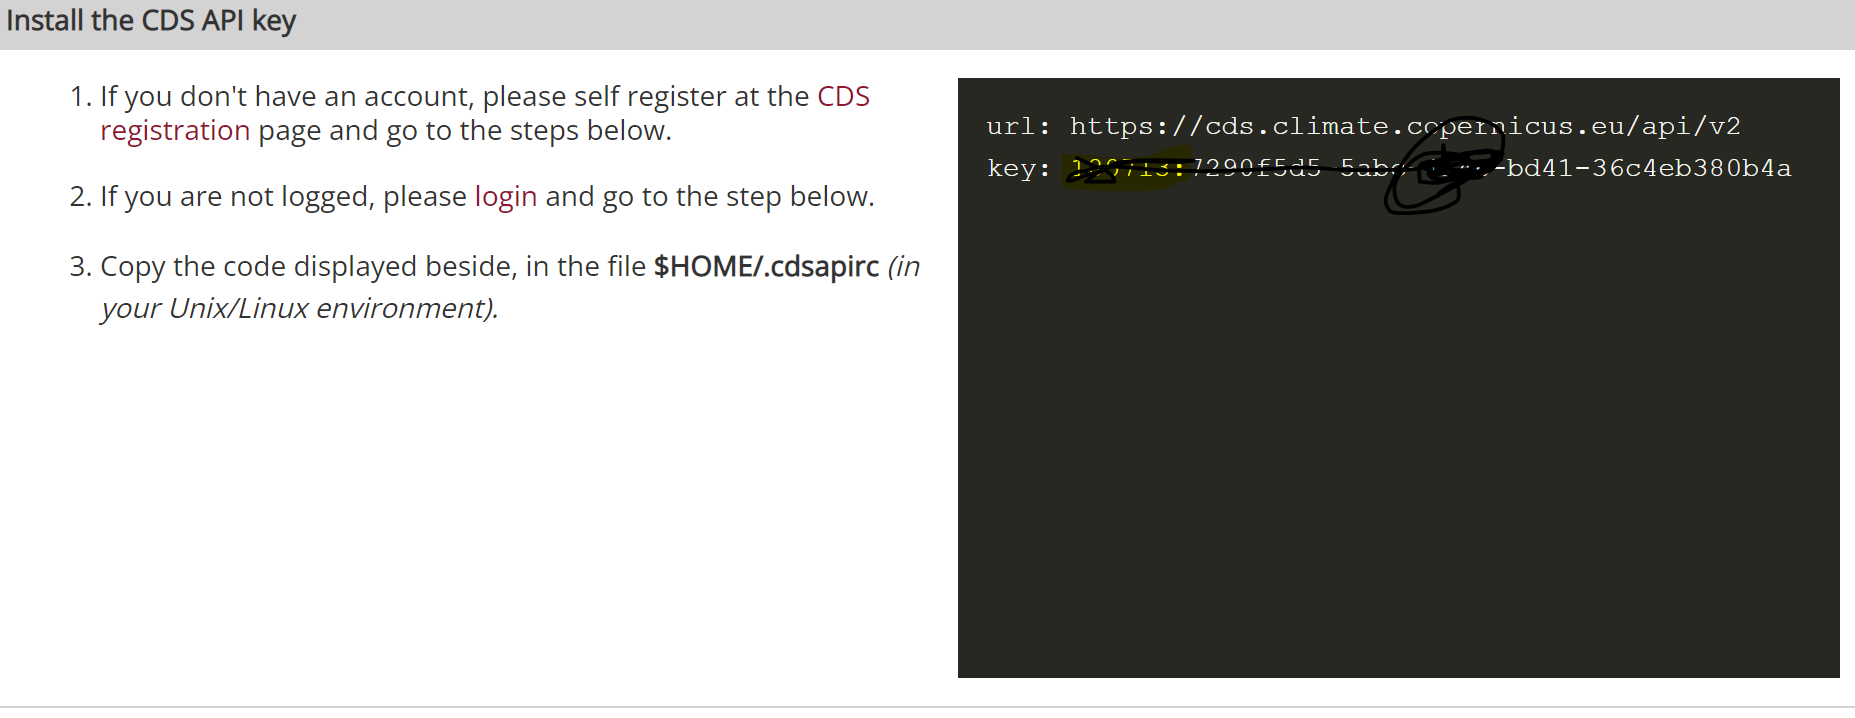:**

In [ ]:
#@title # Loop over the years and download the data for each year  ERA5 { run: "auto" }
# Define the years list
years = []
for y in range(2013, 2023):
    years.append(str(y))

# Define the API key
api_key = "180983:a058354a-5f89-4482-b477-248d762e109c" # Change to your_api_key

# Define the root directory for data downloads
root_dir = "/content/drive/MyDrive/Climate/.climate_tutorial"

# Define the dataset and variable to download



dataset = "era5"
variable = "2m_temperature"

#This method of selecting an area of interest can be seen here.: https://youtu.be/EIe7IBMqhsw
'''
The area list corresponds to the latitude and longitude boundaries of the region of interest in the xarray dataset.

The first and third elements of the area list correspond to the minimum and maximum latitude values of the region of interest, respectively. In this case, the minimum latitude is -5.2 and the maximum latitude is 31.

The second and fourth elements of the area list correspond to the minimum and maximum longitude values of the region of interest, respectively. In this case, the minimum longitude is 34 and the maximum longitude is 45.

The latitude and longitude coordinates in the xarray dataset should fall within these boundary values to be considered part of the region of interest.

'''


area = [42, -81, 45, -78]

resolution = str(0.05)

# Loop over the years and download the data for each year
for i, year in enumerate(years):
    #download_copernicus(root=root_dir, dataset=dataset, variable=variable, year=year, api_key=api_key)
    download_copernicus(root=root_dir, dataset=dataset, variable=variable, year=year, resolution=resolution, area=area, pressure=False, api_key=api_key)


In [2]:
import climetlab as cml
#data = cml.load_source("2m_temperature_2013_0.25deg.nc", "/content/drive/MyDrive/Climate/.climate_tutorial/era5/2m_temperature57_5.625deg.nc")
#"file" means we would like to open the data files directly, so we remain unchanged it in our cases, the second position is the data file path, which I highly recommend saving on Google Drive.
source = cml.load_source("file", "/content/drive/MyDrive/Climate/.climate_tutorial/era5/0.05/2m_temperature/2m_temperature_2013_0.05deg.nc")

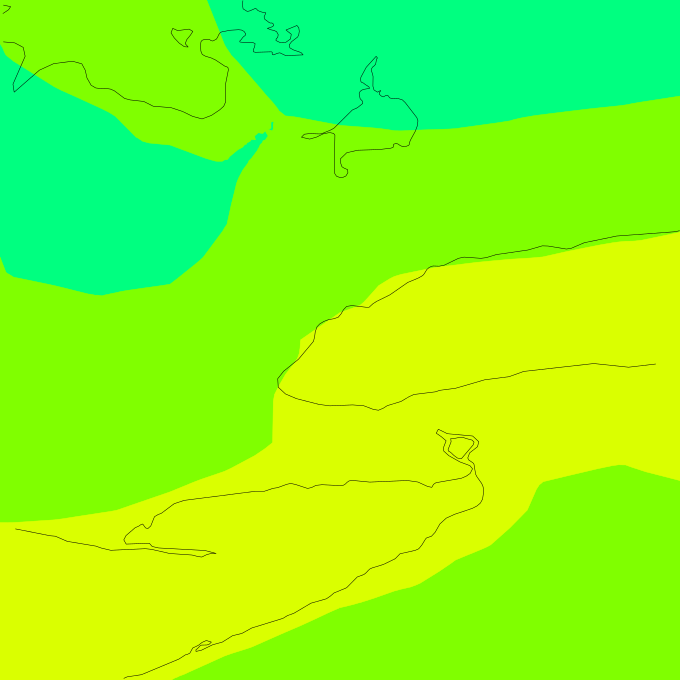

In [3]:
cml.plot_map((source[2], source[3]))

In [ ]:
for s in source:
    cml.plot_map(s)

In [ ]:
source.to_xarray()

ERA5 dataset directory structure from the Weatherbench source.

```
|-- 5.625deg
|   |-- 2m_temperature
|       |-- 2m_temperature_1979_5.625deg.nc
|       |-- 2m_temperature_1980_5.625deg.nc
|       |-- ...
|       |-- 2m_temperature_2018_5.625deg.nc
```

## Data Preprocessing


The data is stored in the [NetCDF](https://en.wikipedia.org/wiki/NetCDF) files with _.nc_ extension. One of the distinct features of this format is the **named** specification to the coordinates and the data variables. 

As shown below, we first merge all the yearly NetCDF files, and display the structure of the format. xarray library is used to read the NetCDF files. It allows the users to manipulate data based on more informative labels instead of integer location. 



In [4]:
from climate_learn.utils.data import load_dataset, view
dataset2 = load_dataset("/content/drive/MyDrive/Climate/.climate_tutorial/era5/0.05/2m_temperature/")
view(dataset2)

<xarray.Dataset>
Dimensions:    (longitude: 61, latitude: 61, time: 87648)
Coordinates:
  * longitude  (longitude) float32 -81.0 -80.95 -80.9 ... -78.1 -78.05 -78.0
  * latitude   (latitude) float32 45.0 44.95 44.9 44.85 ... 42.1 42.05 42.0
  * time       (time) datetime64[ns] 2013-01-01 ... 2022-12-31T23:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 dask.array<chunksize=(8760, 61, 61), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2023-03-06 20:10:52 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

## Data Conversion
We further convert the *NetCDF* files to *PyTorch* Dataloaders.

**Pros**: We can use the dataloaders for training and evaluating neural networks.\
**Cons**: We loose useful meta information (such as 'time', 'location') during conversion as dataloaders only allow for integer location based treatment. 

We store the useful information about
 the data ('lat', 'long') of the regions as _data members_ of our dataloaders.





In [5]:
from climate_learn.utils.data import load_dataset, view
from climate_learn.utils.datetime import Year, Days, Hours
from climate_learn.data.climate_dataset.args import ERA5Args
from climate_learn.data.tasks.args import ForecastingArgs
from climate_learn.data import download1, DataModuleArgs, DataModule


data_args = ERA5Args(
    root_dir = "/content/drive/MyDrive/Climate/.climate_tutorial/era5/2m_temperature/0.05/",
    #root_dir = "/content/drive/MyDrive/Climate/.climate_tutorial/data/weatherbench/era5/5.625/",
    #root_dir = "/content/drive/MyDrive/Climate/.climate_tutorial/era5/",
    variables = ["2m_temperature"],
    years = range(2013, 2022),
)

data_args = ERA5Args(
    #root_dir = "/content/drive/MyDrive/Climate/.climate_tutorial/era5/2m_temperature/0.05/",
    root_dir = "/content/drive/MyDrive/Climate/.climate_tutorial/era5/0.05/",
    #Downloading era5 2m_temperature data for year 2013 from copernicus to /content/drive/MyDrive/Climate/.climate_tutorial/era5/0.05/
    #root_dir = "/content/drive/MyDrive/Climate/.climate_tutorial/data/weatherbench/era5/5.625/",
    #root_dir = "/content/drive/MyDrive/Climate/.climate_tutorial/era5/",
    variables = ["2m_temperature"],
    years = range(2013, 2022),
)
forecasting_args = ForecastingArgs(
    dataset_args = data_args,
    in_vars = ["2m_temperature"],
    out_vars = ["2m_temperature"],
    pred_range = 3*24,
    subsample = 6,
)

data_module_args = DataModuleArgs(
    task_args = forecasting_args,
    train_start_year = 2013,
    val_start_year = 2020,
    test_start_year = 2021,
    deploy_start_year = None, 
    end_year = 2022,
)

data_module = DataModule(
    data_module_args = data_module_args,
    batch_size = 128,
    num_workers = 1
)


Creating train dataset


100%|██████████| 7/7 [00:00<00:00, 63.83it/s]


Creating val dataset


100%|██████████| 1/1 [00:00<00:00, 45.84it/s]


Creating test dataset


100%|██████████| 2/2 [00:00<00:00, 54.76it/s]


In [ ]:
print(DataModule)

<class 'climate_learn.data.module.DataModule'>


## Model initialization 

The hyperparameters and ResNet architecture chosen allow for a model that forecasts with 85.7% test accuracy, while still training within a reasonable amount of time for the sake of the tutorial (by nature of being a smaller model). We leave it to the user to perform a more exhaustive search of hyperparameter values for training models that perform better.

In [6]:
from climate_learn.models import load_model

model_kwargs = {
    "in_channels": len(data_module.hparams.data_module_args.train_task_args.in_vars),
    "out_channels": len(data_module.hparams.data_module_args.train_task_args.out_vars),
    "n_blocks": 4
}

optim_kwargs = {
    "lr": 1e-4,
    "weight_decay": 1e-5,
    "warmup_epochs": 1,
    "max_epochs": 5,
}

model_module = load_model(name = "resnet", task = "forecasting", model_kwargs = model_kwargs, optim_kwargs = optim_kwargs)
#model_module = load_model(name = "vit", task = "forecasting", model_kwargs = model_kwargs, optim_kwargs = optim_kwargs)

In [7]:
'''
from climate_learn.models import load_model

# model_kwargs = {
#     "img_size": [32, 64],
#     "patch_size": 2,
#     "drop_path": 0.1,
#     "drop_rate": 0.1,
#     "learn_pos_emb": True,
#     "in_vars": data_module.hparams.in_vars,
#     "out_vars": data_module.hparams.out_vars,
#     "embed_dim": 128,
#     "depth": 8,
#     "decoder_depth": 0,
#     "num_heads": 4,
#     "mlp_ratio": 4,
# }

model_kwargs = {
    "in_channels": len(data_module.hparams.in_vars),
    "out_channels": len(data_module.hparams.out_vars),
    "n_blocks": 4
}

optim_kwargs = {
    "lr": 1e-4,
    "weight_decay": 1e-5,
    "warmup_epochs": 1,
    "max_epochs": 5,
}

# model_module = load_model(name = "vit", task = "forecasting", model_kwargs = model_kwargs, optim_kwargs = optim_kwargs)
model_module = load_model(name = "resnet", task = "forecasting", model_kwargs = model_kwargs, optim_kwargs = optim_kwargs)
# model_module = load_model(name = "unet", task = "forecasting", model_kwargs = model_kwargs, optim_kwargs = optim_kwargs)
'''

'\nfrom climate_learn.models import load_model\n\n# model_kwargs = {\n#     "img_size": [32, 64],\n#     "patch_size": 2,\n#     "drop_path": 0.1,\n#     "drop_rate": 0.1,\n#     "learn_pos_emb": True,\n#     "in_vars": data_module.hparams.in_vars,\n#     "out_vars": data_module.hparams.out_vars,\n#     "embed_dim": 128,\n#     "depth": 8,\n#     "decoder_depth": 0,\n#     "num_heads": 4,\n#     "mlp_ratio": 4,\n# }\n\nmodel_kwargs = {\n    "in_channels": len(data_module.hparams.in_vars),\n    "out_channels": len(data_module.hparams.out_vars),\n    "n_blocks": 4\n}\n\noptim_kwargs = {\n    "lr": 1e-4,\n    "weight_decay": 1e-5,\n    "warmup_epochs": 1,\n    "max_epochs": 5,\n}\n\n# model_module = load_model(name = "vit", task = "forecasting", model_kwargs = model_kwargs, optim_kwargs = optim_kwargs)\nmodel_module = load_model(name = "resnet", task = "forecasting", model_kwargs = model_kwargs, optim_kwargs = optim_kwargs)\n# model_module = load_model(name = "unet", task = "forecasting",

In [8]:
from climate_learn.models import set_climatology
set_climatology(model_module, data_module)

## Training


The training objective ensures that the machine learning model makes accurate forecasts over the gridded data. We employ latitude weighted RMSE given by:

<br>
$RMSE = \frac{1}{N_{forecasts}}\sum_{i}^{N_{forecasts}}\sqrt{\frac{1}{N_{lat}N_{lon}}\sum_{j}^{N_{lat}}\sum_{k}^{N_{lon}}L(j)(f_{i,j,k}-t_{i,j,k})^{2}} \tag{1}$ 
<br>

where $f$ is the model forecast and $t$ is the ERA5 truth. $L(j)$ is the latitude weighing factor at the $j^{th}$ latitude index:

<br>
$L(j) = \frac{cos(lat(j))}{\frac{1}{N_{lat}}\sum_{j}^{N_{lat}}cos(lat(j))} \tag{2}$
<br>



In [9]:
from climate_learn.training import Trainer, WandbLogger

trainer = Trainer(
    seed = 0,
    accelerator = "gpu",
    precision = 16,
    max_epochs = 5,
    # logger = WandbLogger(project = "climate_tutorial", name = "forecast-vit")
)

INFO:lightning_fabric.utilities.seed:Global seed set to 0
/usr/local/lib/python3.9/dist-packages/lightning_fabric/connector.py:562: UserWarning: 16 is supported for historical reasons but its usage is discouraged. Please set your precision to 16-mixed instead!
  rank_zero_warn(


In [10]:
trainer.fit(model_module, data_module)

Creating train dataset


100%|██████████| 7/7 [00:00<00:00, 33.13it/s]


Creating val dataset


100%|██████████| 1/1 [00:00<00:00, 38.12it/s]


Creating test dataset


100%|██████████| 2/2 [00:00<00:00, 46.53it/s]


┏━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃    ┃ Name                       ┃ Type              ┃ Params ┃
┡━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0  │ net                        │ ResNet            │  1.2 M │
│ 1  │ net.activation             │ LeakyReLU         │      0 │
│ 2  │ net.image_proj             │ PeriodicConv2D    │  6.4 K │
│ 3  │ net.image_proj.padding     │ PeriodicPadding2D │      0 │
│ 4  │ net.image_proj.conv        │ Conv2d            │  6.4 K │
│ 5  │ net.blocks                 │ ModuleList        │  1.2 M │
│ 6  │ net.blocks.0               │ ResidualBlock     │  295 K │
│ 7  │ net.blocks.0.activation    │ LeakyReLU         │      0 │
│ 8  │ net.blocks.0.conv1         │ PeriodicConv2D    │  147 K │
│ 9  │ net.blocks.0.conv1.padding │ PeriodicPadding2D │      0 │
│ 10 │ net.blocks.0.conv1.conv    │ Conv2d            │  147 K │
│ 11 │ net.blocks.0.conv2         │ PeriodicConv2D    │  147 K │
│ 12 │ net.blocks.0.conv2.padding │ PeriodicPadding2D │      0 │
│ 13 │ net.blocks.0.conv2.conv    │ Conv2d            │  147 K │
│ 14 │ net.blocks.0.shortcut      │ Identity          │      0 │
│ 15 │ net.blocks.0.norm1         │ BatchNorm2d       │    256 │
│ 16 │ net.blocks.0.norm2         │ BatchNorm2d       │    256 │
│ 17 │ net.blocks.0.drop          │ Dropout           │      0 │
│ 18 │ net.blocks.1               │ ResidualBlock     │  295 K │
│ 19 │ net.blocks.1.activation    │ LeakyReLU         │      0 │
│ 20 │ net.blocks.1.conv1         │ PeriodicConv2D    │  147 K │
│ 21 │ net.blocks.1.conv1.padding │ PeriodicPadding2D │      0 │
│ 22 │ net.blocks.1.conv1.conv    │ Conv2d            │  147 K │
│ 23 │ net.blocks.1.conv2         │ PeriodicConv2D    │  147 K │
│ 24 │ net.blocks.1.conv2.padding │ PeriodicPadding2D │      0 │
│ 25 │ net.blocks.1.conv2.conv    │ Conv2d            │  147 K │
│ 26 │ net.blocks.1.shortcut      │ Identity          │      0 │
│ 27 │ net.blocks.1.norm1         │ BatchNorm2d       │    256 │
│ 28 │ net.blocks.1.norm2         │ BatchNorm2d       │    256 │
│ 29 │ net.blocks.1.drop          │ Dropout           │      0 │
│ 30 │ net.blocks.2               │ ResidualBlock     │  295 K │
│ 31 │ net.blocks.2.activation    │ LeakyReLU         │      0 │
│ 32 │ net.blocks.2.conv1         │ PeriodicConv2D    │  147 K │
│ 33 │ net.blocks.2.conv1.padding │ PeriodicPadding2D │      0 │
│ 34 │ net.blocks.2.conv1.conv    │ Conv2d            │  147 K │
│ 35 │ net.blocks.2.conv2         │ PeriodicConv2D    │  147 K │
│ 36 │ net.blocks.2.conv2.padding │ PeriodicPadding2D │      0 │
│ 37 │ net.blocks.2.conv2.conv    │ Conv2d            │  147 K │
│ 38 │ net.blocks.2.shortcut      │ Identity          │      0 │
│ 39 │ net.blocks.2.norm1         │ BatchNorm2d       │    256 │
│ 40 │ net.blocks.2.norm2         │ BatchNorm2d       │    256 │
│ 41 │ net.blocks.2.drop          │ Dropout           │      0 │
│ 42 │ net.blocks.3               │ ResidualBlock     │  295 K │
│ 43 │ net.blocks.3.activation    │ LeakyReLU         │      0 │
│ 44 │ net.blocks.3.conv1         │ PeriodicConv2D    │  147 K │
│ 45 │ net.blocks.3.conv1.padding │ PeriodicPadding2D │      0 │
│ 46 │ net.blocks.3.conv1.conv    │ Conv2d            │  147 K │
│ 47 │ net.blocks.3.conv2         │ PeriodicConv2D    │  147 K │
│ 48 │ net.blocks.3.conv2.padding │ PeriodicPadding2D │      0 │
│ 49 │ net.blocks.3.conv2.conv    │ Conv2d            │  147 K │
│ 50 │ net.blocks.3.shortcut      │ Identity          │      0 │
│ 51 │ net.blocks.3.norm1         │ BatchNorm2d       │    256 │
│ 52 │ net.blocks.3.norm2         │ BatchNorm2d       │    256 │
│ 53 │ net.blocks.3.drop          │ Dropout           │      0 │
│ 54 │ net.norm                   │ BatchNorm2d       │    256 │
│ 55 │ net.final                  │ PeriodicConv2D    │  6.3 K │
│ 56 │ net.final.padding          │ PeriodicPadding2D │      0 │
│ 57 │ net.final.conv             │ Conv2d            │  6.3 K │
│ 58 │ denormalization            │

Trainable params: 1.2 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.2 M                                                                                                
Total estimated model params size (MB): 4

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [11]:
model_module2 = load_model(name = "resnet", task = "forecasting", model_kwargs = model_kwargs, optim_kwargs = optim_kwargs)
model_module.lat

array([45.  , 44.95, 44.9 , 44.85, 44.8 , 44.75, 44.7 , 44.65, 44.6 ,
       44.55, 44.5 , 44.45, 44.4 , 44.35, 44.3 , 44.25, 44.2 , 44.15,
       44.1 , 44.05, 44.  , 43.95, 43.9 , 43.85, 43.8 , 43.75, 43.7 ,
       43.65, 43.6 , 43.55, 43.5 , 43.45, 43.4 , 43.35, 43.3 , 43.25,
       43.2 , 43.15, 43.1 , 43.05, 43.  , 42.95, 42.9 , 42.85, 42.8 ,
       42.75, 42.7 , 42.65, 42.6 , 42.55, 42.5 , 42.45, 42.4 , 42.35,
       42.3 , 42.25, 42.2 , 42.15, 42.1 , 42.05, 42.  ], dtype=float32)

In [12]:
'''import torch

# Save model state_dict and denormalization layer information
torch.save({
    'model_state_dict': model_module.state_dict(),
    'denormalization_mean': model_module.denormalization.mean,
    'denormalization_std': model_module.denormalization.std,
    'pred_range': model_module.pred_range,
    'lat': model_module.lat,
    'test_clim': model_module.test_clim,
    'train_clim': model_module.train_clim
}, 'trained_model2.pth')'''

"import torch\n\n# Save model state_dict and denormalization layer information\ntorch.save({\n    'model_state_dict': model_module.state_dict(),\n    'denormalization_mean': model_module.denormalization.mean,\n    'denormalization_std': model_module.denormalization.std,\n    'pred_range': model_module.pred_range,\n    'lat': model_module.lat,\n    'test_clim': model_module.test_clim,\n    'train_clim': model_module.train_clim\n}, 'trained_model2.pth')"

In [13]:
import os
import torch

#The specific file for saving the trained model has been created and is ready to be reused. 
save_dir = "/content/drive/MyDrive/Climate/.climate_tutorial/trained model/"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

save_path = "/content/drive/MyDrive/Climate/.climate_tutorial/trained model/xufeng_model.pth" #When saving your work, it is important to remember to choose a unique file name.  
# Save model state_dict and denormalization layer information
torch.save({
    'model_state_dict': model_module.state_dict(),
    'denormalization_mean': model_module.denormalization.mean,
    'denormalization_std': model_module.denormalization.std,
    'pred_range': model_module.pred_range,
    'lat': model_module.lat,
    'test_clim': model_module.test_clim,
    'train_clim': model_module.train_clim
}, save_path)


In [14]:
"""import torch
from torchvision.transforms import Normalize

save_path = "/content/drive/MyDrive/Climate/.climate_tutorial/trained model/trained_model0319.pth"

# Load the state_dict and denormalization layer information
checkpoint = torch.load(save_path)
model_state_dict = checkpoint['model_state_dict']
denormalization_mean = checkpoint['denormalization_mean']
denormalization_std = checkpoint['denormalization_std']
pred_range = checkpoint['pred_range']
lat = checkpoint['lat']
test_clim = checkpoint['test_clim']
train_clim = checkpoint['train_clim']

# Update the model_module2 with the loaded state_dict
model_module2.load_state_dict(model_state_dict)
model_module2.pred_range = pred_range
model_module2.lat = lat
model_module2.test_clim = test_clim
model_module2.train_clim = train_clim

# Recreate the denormalization layer using the saved mean and standard deviation
model_module2.denormalization = Normalize(mean=denormalization_mean, std=denormalization_std)"""

'import torch\nfrom torchvision.transforms import Normalize\n\nsave_path = "/content/drive/MyDrive/Climate/.climate_tutorial/trained model/trained_model0319.pth"\n\n# Load the state_dict and denormalization layer information\ncheckpoint = torch.load(save_path)\nmodel_state_dict = checkpoint[\'model_state_dict\']\ndenormalization_mean = checkpoint[\'denormalization_mean\']\ndenormalization_std = checkpoint[\'denormalization_std\']\npred_range = checkpoint[\'pred_range\']\nlat = checkpoint[\'lat\']\ntest_clim = checkpoint[\'test_clim\']\ntrain_clim = checkpoint[\'train_clim\']\n\n# Update the model_module2 with the loaded state_dict\nmodel_module2.load_state_dict(model_state_dict)\nmodel_module2.pred_range = pred_range\nmodel_module2.lat = lat\nmodel_module2.test_clim = test_clim\nmodel_module2.train_clim = train_clim\n\n# Recreate the denormalization layer using the saved mean and standard deviation\nmodel_module2.denormalization = Normalize(mean=denormalization_mean, std=denormalizatio

## Evaluation 


In [16]:
trainer.test(model_module, data_module)

Creating train dataset


100%|██████████| 7/7 [00:00<00:00, 21.46it/s]


Creating val dataset


100%|██████████| 1/1 [00:00<00:00, 23.33it/s]


Creating test dataset


100%|██████████| 2/2 [00:00<00:00, 23.91it/s]


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                      Test metric                       ┃                      DataLoader 0                      ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│                        test/acc                        │                  0.21698279678821564                   │
│            test/acc_2m_temperature_3.0_days            │                  0.21698279678821564                   │
│                      test/w_rmse                       │                   4.537714004516602                    │
│          test/w_rmse_2m_temperature_3.0_days           │                   4.537714004516602                    │
│            test_climatology_baseline/w_rmse            │                   9.234206199645996                    │
│ test_climatology_baseline/w_rmse_2m_temperature_3.0_d… │                   9.234206199645996                    │
│            test_persistence_baseline/w_rmse            │                   4.803724765777588                    │
│ test_persistence_baseline/w_rmse_2m_temperature_3.0_d… │                   4.803724765777588                    │
└────────────────────────────────────────────────────────┴────────────────────────────────────────────────────────┘

The model's prediction has a strong correlation with the ground truth, which is indicated by a high ACC value. Compared to a climatological forecast, the deep learning model achieves a much smaller RMSE error.

In [22]:
import torch
from torchvision.transforms import Normalize

save_path = "/content/drive/MyDrive/Climate/.climate_tutorial/trained model/xufeng_model.pth"

# Load the state_dict and denormalization layer information
checkpoint = torch.load(save_path)
model_state_dict = checkpoint['model_state_dict']
denormalization_mean = checkpoint['denormalization_mean']
denormalization_std = checkpoint['denormalization_std']
pred_range = checkpoint['pred_range']
lat = checkpoint['lat']
test_clim = checkpoint['test_clim']
train_clim = checkpoint['train_clim']

# Update the model_module2 with the loaded state_dict
model_module2.load_state_dict(model_state_dict)
model_module2.pred_range = pred_range
model_module2.lat = lat
model_module2.test_clim = test_clim
model_module2.train_clim = train_clim

# Recreate the denormalization layer using the saved mean and standard deviation
model_module2.denormalization = Normalize(mean=denormalization_mean, std=denormalization_std)
from climate_learn.models import fit_lin_reg_baseline
fit_lin_reg_baseline(model_module2, data_module, reg_hparam=0.0)
trainer.test(model_module2, data_module)

Creating train dataset


100%|██████████| 7/7 [00:00<00:00, 20.61it/s]


Creating val dataset


100%|██████████| 1/1 [00:00<00:00, 19.66it/s]


Creating test dataset


100%|██████████| 2/2 [00:00<00:00, 26.44it/s]


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                      Test metric                       ┃                      DataLoader 0                      ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│                        test/acc                        │                  0.21698279678821564                   │
│            test/acc_2m_temperature_3.0_days            │                  0.21698279678821564                   │
│                      test/w_rmse                       │                   4.537714004516602                    │
│          test/w_rmse_2m_temperature_3.0_days           │                   4.537714004516602                    │
│            test_climatology_baseline/w_rmse            │                   9.234206199645996                    │
│ test_climatology_baseline/w_rmse_2m_temperature_3.0_d… │                   9.234206199645996                    │
│            test_persistence_baseline/w_rmse            │                   4.803724765777588                    │
│ test_persistence_baseline/w_rmse_2m_temperature_3.0_d… │                   4.803724765777588                    │
│         test_ridge_regression_baseline/w_rmse          │                   4.8037261962890625                   │
│ test_ridge_regression_baseline/w_rmse_2m_temperature_… │                   4.8037261962890625                   │
└────────────────────────────────────────────────────────┴────────────────────────────────────────────────────────┘

## Visualization 

We visualize the **bias**, given by the difference in the predicted and the ground truth values, to better analyze our learned model.

Visualization is done on the test set. We can either specify exact time for the initial condition, or randomly sample from the test set.

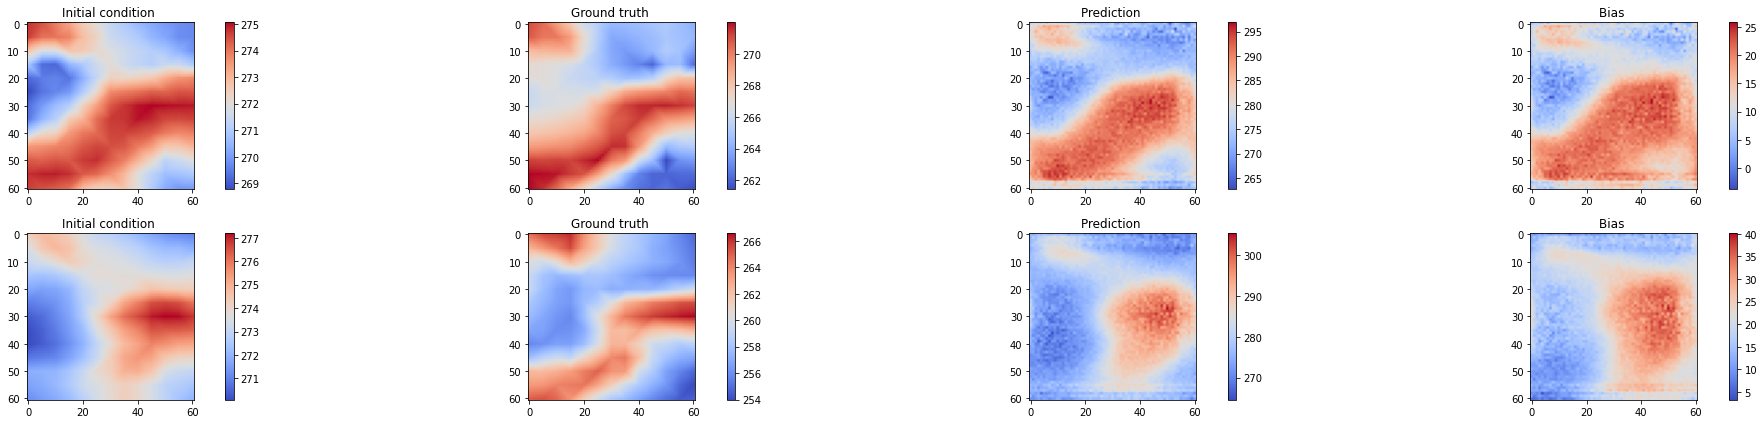

In [17]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

def visualize(model_module, data_module, split = "test", samples = 2, save_dir = None):
    if save_dir is not None:
        os.makedirs(save_dir, exist_ok = True)

    # dataset.setup()
    dataset = eval(f"data_module.{split}_dataset")

    if(type(samples) == int):
        idxs = random.sample(range(0, len(dataset)), samples)
    elif(type(samples) == list):
        idxs = [np.searchsorted(dataset.time, np.datetime64(datetime.strptime(dt, "%Y-%m-%d:%H"))) for dt in samples]
    else:
        raise Exception("Invalid type for samples; Allowed int or list[datetime.datetime or np.datetime64]")

    fig, axes = plt.subplots(len(idxs), 4, figsize=(30, 3 * len(idxs)), squeeze = False)

    for index, idx in enumerate(idxs):
        x, y, _, _ = dataset[idx] # 1, 1, 32, 64
        pred = model_module.forward(x.unsqueeze(0)) # 1, 1, 32, 64

        inv_normalize = model_module.denormalization
        init_condition, gt = inv_normalize(x), inv_normalize(y)
        pred = inv_normalize(pred)
        bias = pred - gt

        for i, tensor in enumerate([init_condition, gt, pred, bias]):
            ax = axes[index][i]
            im = ax.imshow(tensor.detach().squeeze().cpu().numpy())
            im.set_cmap(cmap=plt.cm.coolwarm)
            fig.colorbar(im, ax=ax)


            axes[index][0].set_title("Initial condition ")
            axes[index][1].set_title("Ground truth ")
            axes[index][2].set_title("Prediction ")
            axes[index][3].set_title("Bias ")


    fig.tight_layout()
    
    if save_dir is not None:
        plt.savefig(os.path.join(save_dir, 'visualize.png'))
    else:
        plt.show()

# if samples = 2, we randomly pick 2 initial conditions in the test set
visualize(model_module, data_module, samples = ["2021-02-01:12", "2021-08-01:18"])


The visualization shows that the model makes reasonably accurate predictions in most parts of the globe, and the prediction well correlates with the ground truth. The model seems to make large errors near the two poles, where the temperature is more unpredictable. We can improve the accuracy of the model by either including more input variables, using a more expressive model, or training for longer. For the sake of this tutorial, we use a small model and only train for a short time.

In addition to visualizing the bias the model makes for each individual data point, we can also visualize the mean bias across the entire test set.

100%|██████████| 137/137 [01:06<00:00,  2.05it/s]


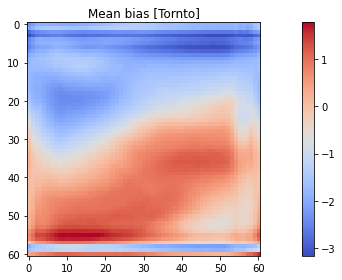

In [18]:
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt

def visualize_mean_bias(model_module, data_module, save_dir = None):
    if save_dir is not None:
        os.makedirs(save_dir, exist_ok = True)

    loader = data_module.test_dataloader()

    all_mean_bias = []
    for batch in tqdm(loader):
      x, y, _, _ = batch # B, 1, 32, 64
      x = x.to(model_module.device)
      y = y.to(model_module.device)
      pred = model_module.forward(x) # B, 1, 32, 64

      inv_normalize = model_module.denormalization
      init_condition, gt = inv_normalize(x), inv_normalize(y)
      pred = inv_normalize(pred)
      bias = pred - gt # B, 1, 32, 64
      mean_bias = bias.mean(dim=0)
      all_mean_bias.append(mean_bias)
    
    all_mean_bias = torch.stack(all_mean_bias, dim=0)
    mean_bias = torch.mean(all_mean_bias, dim=0)

    fig, axes = plt.subplots(1, 1, figsize=(12, 4), squeeze = False)
    ax = axes[0,0]

    im = ax.imshow(mean_bias.detach().squeeze().cpu().numpy())
    im.set_cmap(cmap=plt.cm.coolwarm)
    fig.colorbar(im, ax=ax)
    ax.set_title("Mean bias [Tornto]")

    fig.tight_layout()
    
    if save_dir is not None:
        plt.savefig(os.path.join(save_dir, 'visualize_mean_bias.png'))
    else:
        plt.show()
  
visualize_mean_bias(model_module.cuda(), data_module)